<a href="https://colab.research.google.com/github/akashkumar181/Kidney_Disease_Prediction__System/blob/main/Kidney_Disease_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Kidney Disease Prediction System**



In [ ]:

# Step 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Step 2. Load the Dataset

df = pd.read_csv("/content/updatedml.csv")
df.replace("?", np.nan, inplace=True)
print(df.head())

   Age  Blood Pressure  Specific Gravity  Albumin  Sugar Red Blood Cells  \
0   71             130          1.017245        0      0        abnormal   
1   34             103          1.009262        2      2          normal   
2   80             178          1.023781        1      1          normal   
3   40             103          1.005134        3      4        abnormal   
4   43              96          1.020446        0      3          normal   

  Pus Cells Pus Cell Clumps     Bacteria  Blood Glucose Random  ...  \
0    normal         present      present                    66  ...   
1    normal         present  not present                   176  ...   
2    normal     not present  not present                   161  ...   
3  abnormal         present      present                   185  ...   
4    normal         present  not present                   109  ...   

   Packed Cell Volume  White Blood Cell Count  Red Blood Cell Count  \
0                46.0                   11644

In [ ]:
# Step 3. Exploratory Data Analysis (EDA)
print("\n===== Data Structure Info =====")
print(df.info())

print("\n===== Summary Statistics =====")
print(df.describe(include='all'))




===== Data Structure Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2000 non-null   int64  
 1   Blood Pressure           2000 non-null   int64  
 2   Specific Gravity         2000 non-null   float64
 3   Albumin                  2000 non-null   int64  
 4   Sugar                    2000 non-null   int64  
 5   Red Blood Cells          2000 non-null   object 
 6   Pus Cells                2000 non-null   object 
 7   Pus Cell Clumps          2000 non-null   object 
 8   Bacteria                 2000 non-null   object 
 9   Blood Glucose Random     2000 non-null   int64  
 10  Blood Urea               1990 non-null   float64
 11  Serum Creatinine         2000 non-null   float64
 12  Sodium                   1985 non-null   float64
 13  Potassium                2000 non-null   floa

In [ ]:
print("\n===== Percentage of Missing Values (Before Cleaning) =====")
missing_percentage = df.isnull().mean() * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


===== Percentage of Missing Values (Before Cleaning) =====
Sodium                  0.75
Blood Urea              0.50
Hemoglobin              0.50
Packed Cell Volume      0.50
Red Blood Cell Count    0.25
dtype: float64


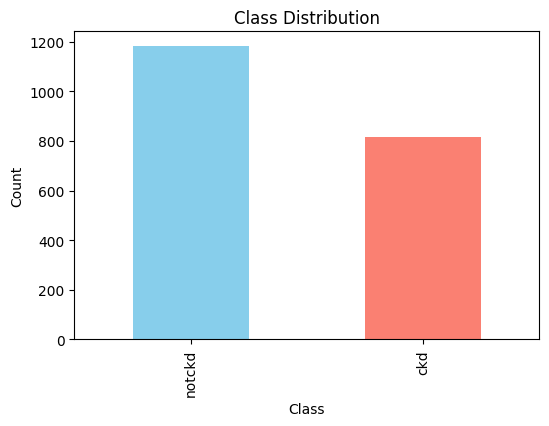

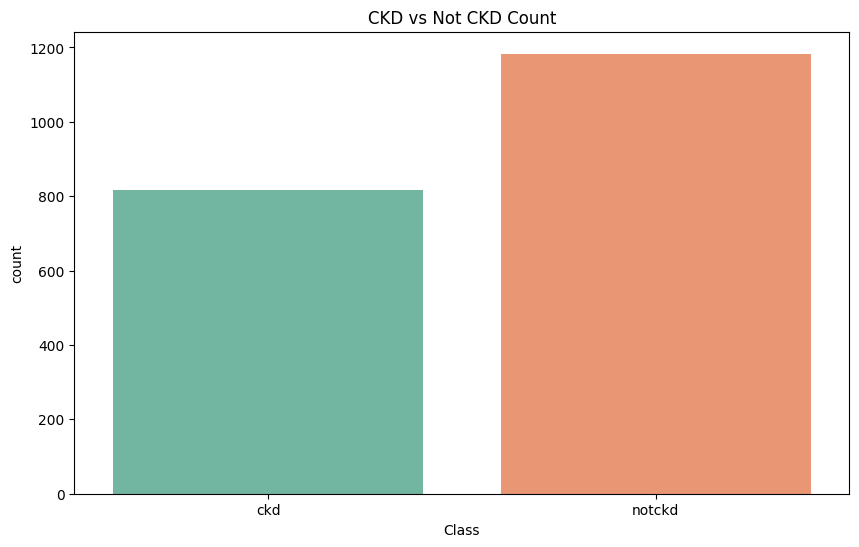

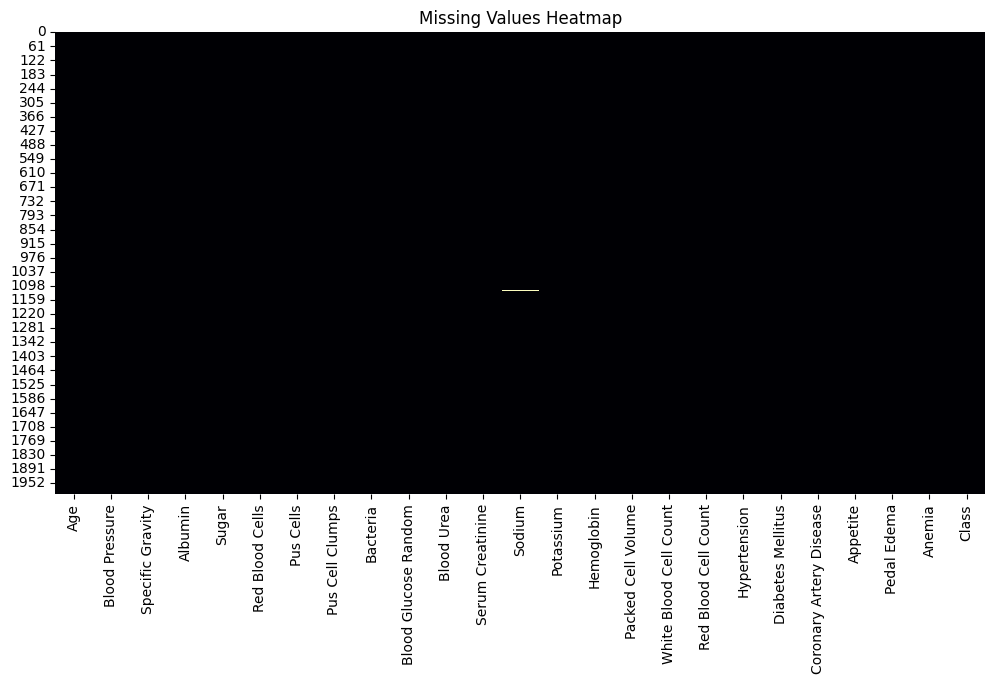

In [ ]:
#  Class Distribution
plt.figure(figsize=(6,4))
df['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='Class', data=df, palette='Set2', hue='Class', legend=False)
plt.title("CKD vs Not CKD Count")
plt.show()
# 🔹 Missing Values Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# Step 4. Data Cleaning
cols_to_numeric = ['Packed Cell Volume', 'White Blood Cell Count', 'Red Blood Cell Count']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

print("\n===== Percentage of Missing Values (After Cleaning) =====")
missing_percentage_after = df.isnull().mean() * 100
print(missing_percentage_after[missing_percentage_after > 0].sort_values(ascending=False))


===== Percentage of Missing Values (After Cleaning) =====
Series([], dtype: float64)


In [ ]:
# Step 5. Label Encoding for Categorical Variables
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

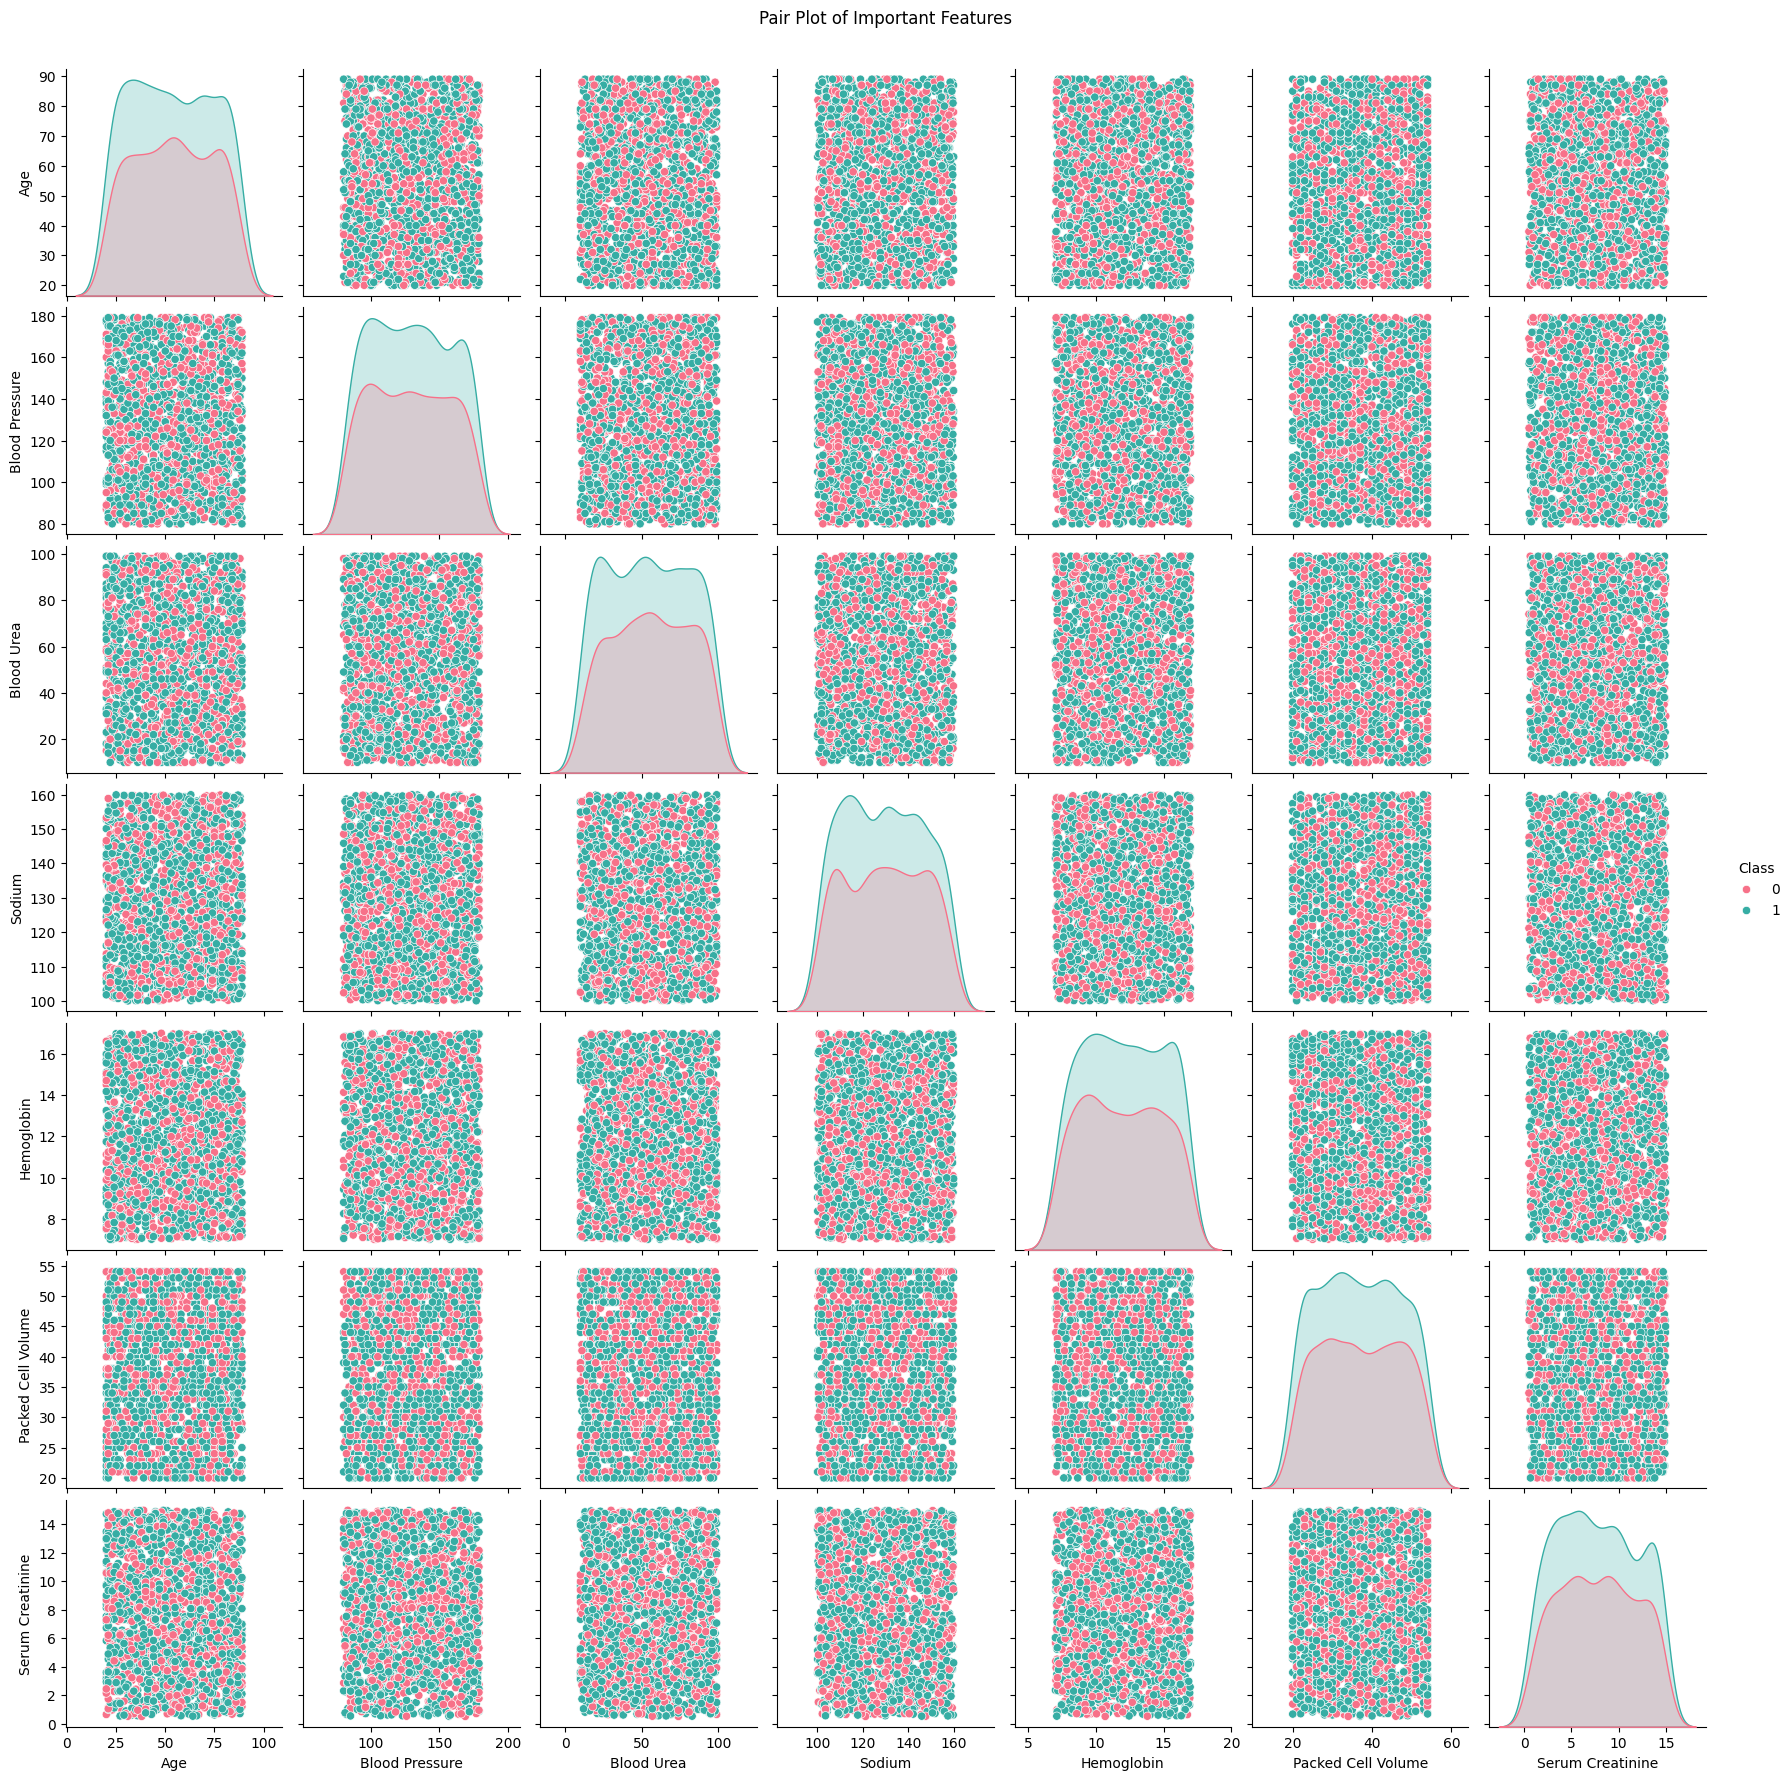

In [ ]:
# Step 6. Bivariate Analysis and Visual EDA
# 🔹 Pair Plot
selected_features_for_pair = ['Age', 'Blood Pressure', 'Blood Urea', 'Sodium',
                              'Hemoglobin', 'Packed Cell Volume', 'Serum Creatinine', 'Class']
sns.pairplot(df[selected_features_for_pair], hue='Class', palette='husl')
plt.suptitle("Pair Plot of Important Features", y=1.02)
plt.show()



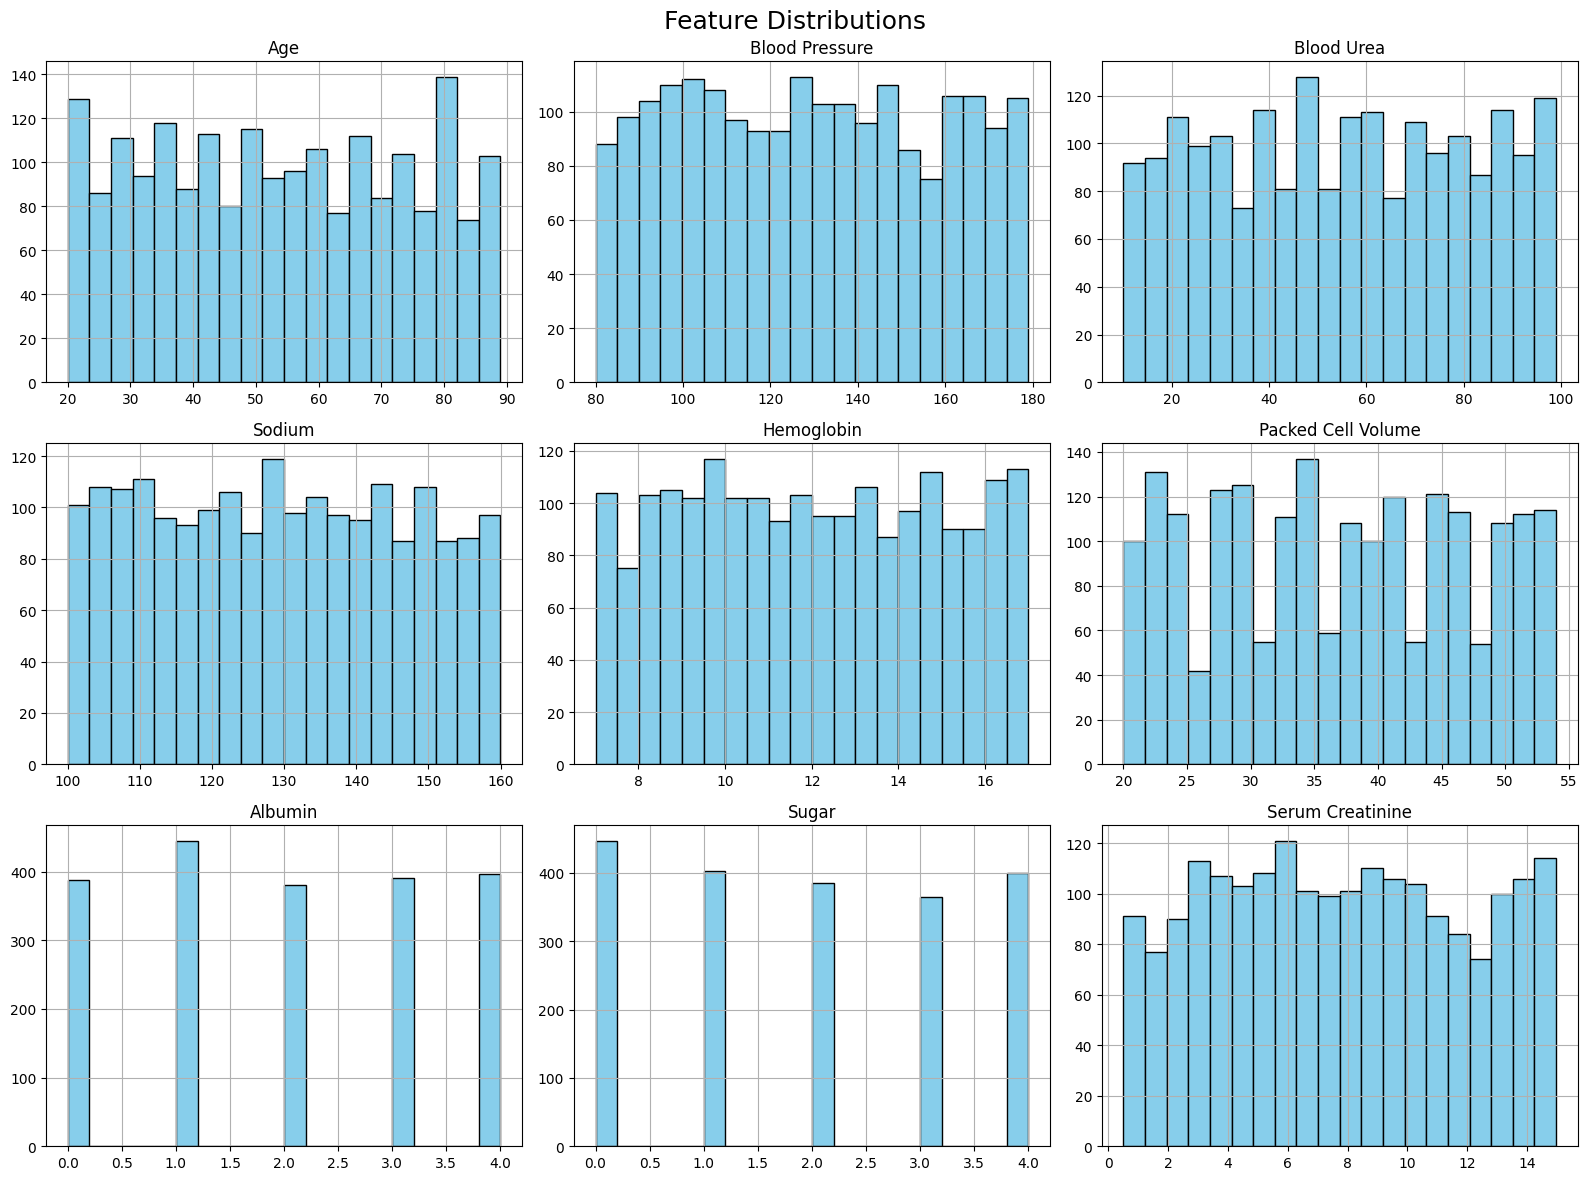

In [ ]:
# 🔹 Feature Distributions
important_cols = ['Age', 'Blood Pressure', 'Blood Urea', 'Sodium', 'Hemoglobin',
                  'Packed Cell Volume', 'Albumin', 'Sugar', 'Serum Creatinine']
df[important_cols].hist(figsize=(16,12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=18)
plt.tight_layout()
plt.show()

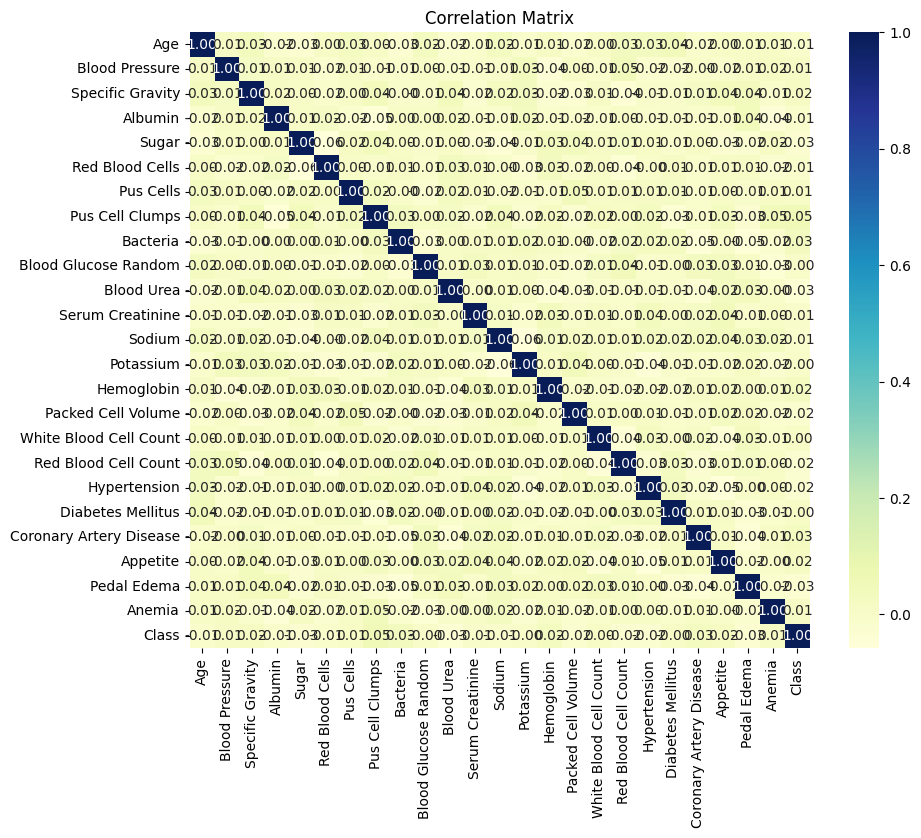

In [ ]:
# 🔹 Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

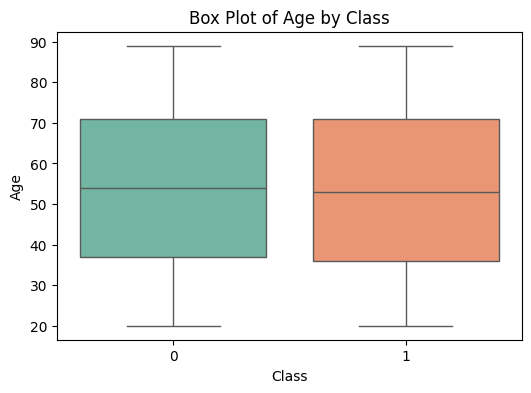

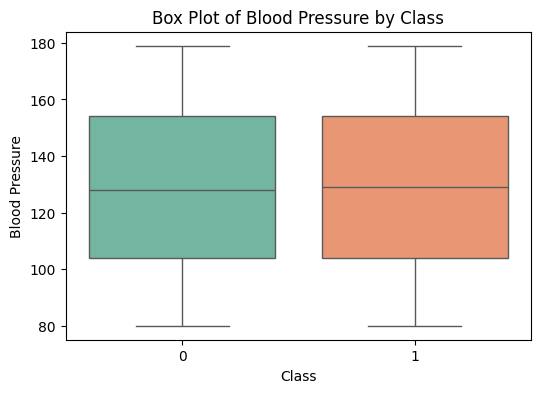

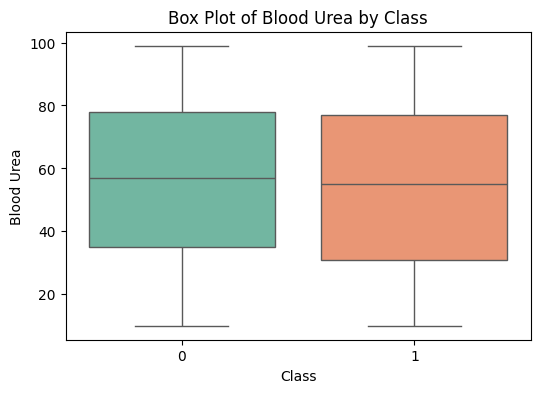

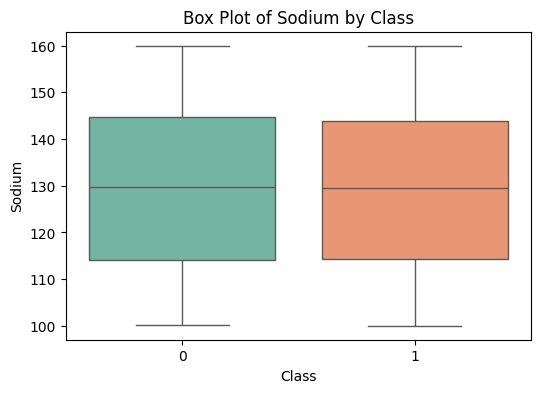

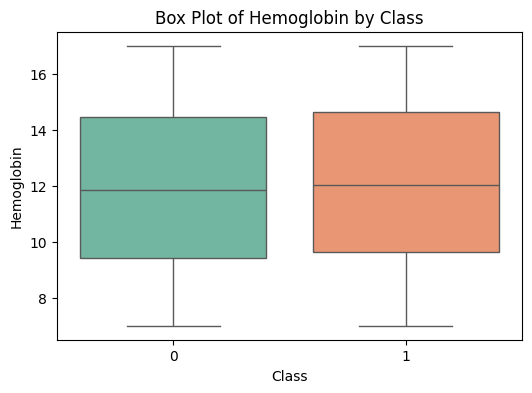

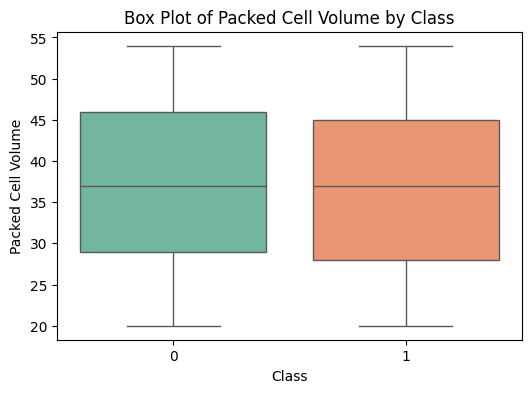

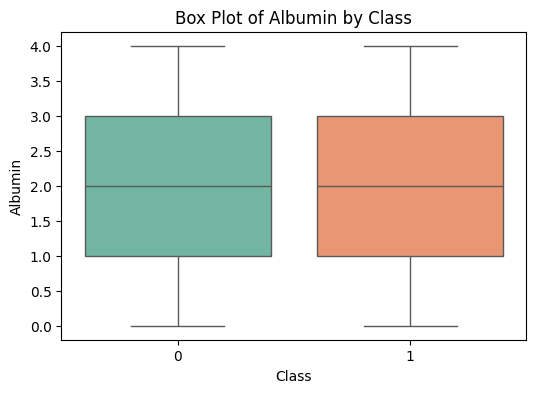

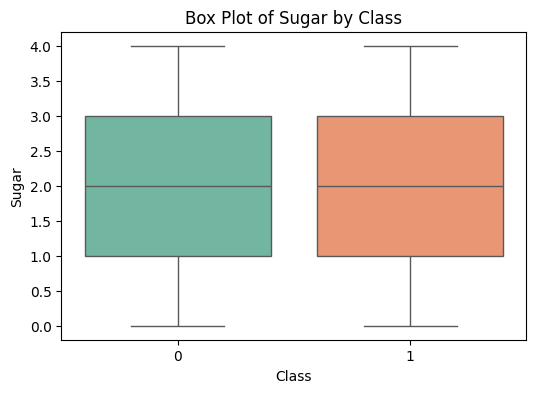

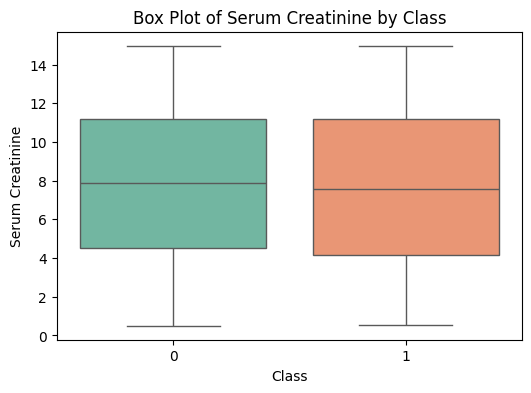

In [ ]:
# 🔹 Box Plots for Key Features
for col in important_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Class', y=col, data=df, hue='Class', palette='Set2', legend=False)
    plt.title(f"Box Plot of {col} by Class")
    plt.show()

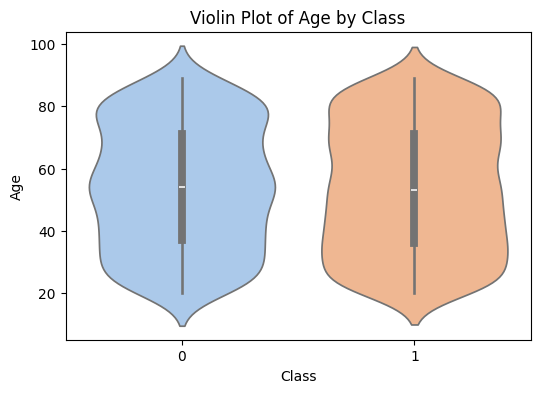

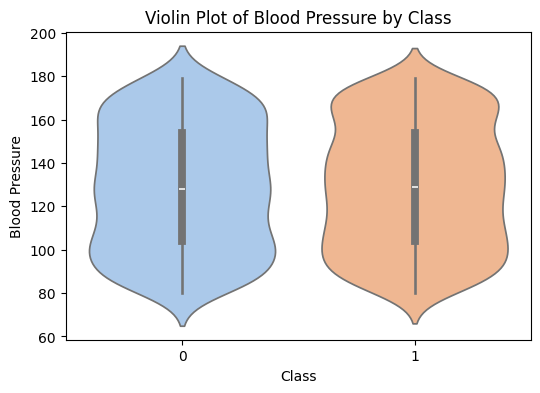

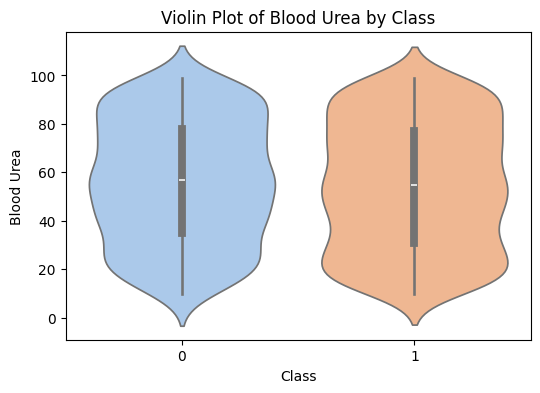

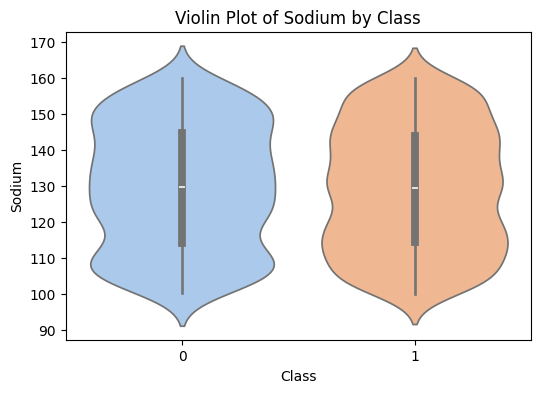

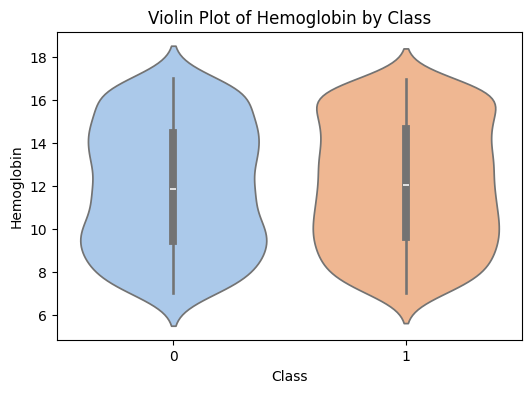

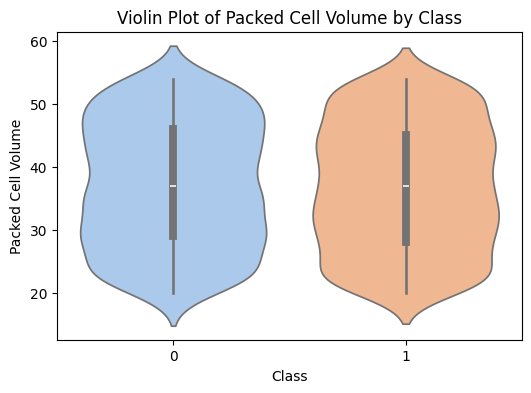

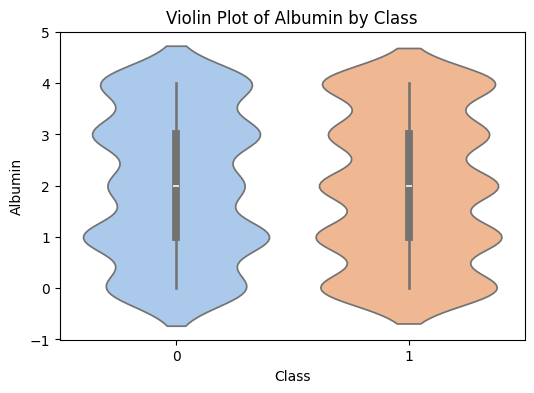

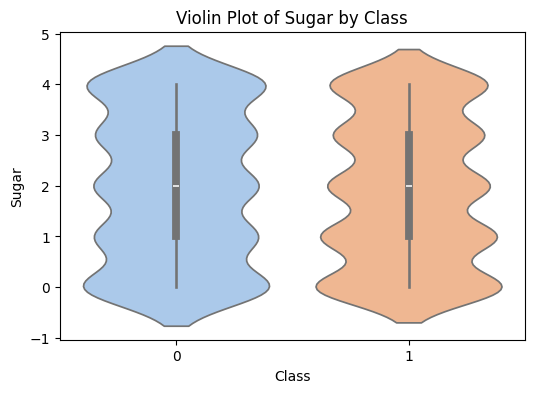

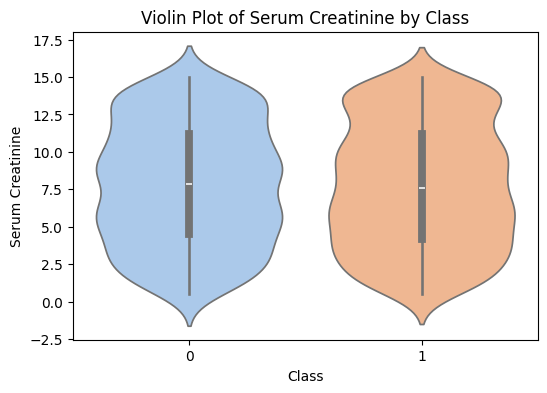

In [ ]:
# 🔹 Violin Plots for Key Features
for col in important_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Class', y=col, data=df, hue='Class', palette='pastel', legend=False)
    plt.title(f"Violin Plot of {col} by Class")
    plt.show()

In [ ]:
# Step 7. Feature Selection
features = ['Age', 'Blood Pressure', 'Blood Urea', 'Sodium', 'Hemoglobin',
            'Packed Cell Volume', 'Albumin', 'Sugar', 'Serum Creatinine']
X = df[features]
y = df['Class']

In [ ]:
# Step 8. Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Step 9. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 10. Model Training (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)


===== Model Evaluation =====
Accuracy: 0.5625

Confusion Matrix:
 [[  0 175]
 [  0 225]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       175
           1       0.56      1.00      0.72       225

    accuracy                           0.56       400
   macro avg       0.28      0.50      0.36       400
weighted avg       0.32      0.56      0.41       400



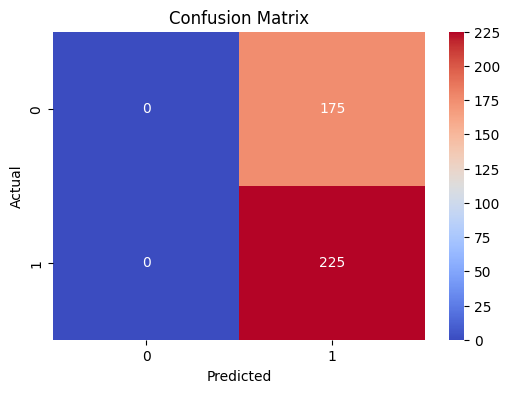

In [ ]:
# Step 11. Model Evaluation
print("\n===== Model Evaluation =====")
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# step 12. User Input for Live Prediction
print("\nPlease enter the following medical values for CKD prediction:")
user_input = []
prompts = {
    'Age': "Enter your age in years: ",
    'Blood Pressure': "Enter your blood pressure (in mmHg): ",
    'Blood Urea': "Enter your blood urea level (in mg/dL): ",
    'Sodium': "Enter your sodium level (in mEq/L): ",
    'Hemoglobin': "Enter your hemoglobin level (in g/dL): ",
    'Packed Cell Volume': "Enter your packed cell volume: ",
    'Albumin': "Enter albumin value (0-5 scale): ",
    'Sugar': "Enter sugar value (0-5 scale): ",
    'Serum Creatinine': "Enter serum creatinine (in mg/dL): "
}

for feature in features:
    value = float(input(prompts[feature]))
    user_input.append(value)

user_df = pd.DataFrame([user_input], columns=features)
user_scaled = scaler.transform(user_df)
prediction = model.predict(user_scaled)
probabilities = model.predict_proba(user_scaled)

if prediction[0] == 1:
    result = "Chronic Kidney Disease patient"
else:
    result = "Not Chronic Kidney Disease patient"

print("\nPrediction Result: You are likely", result)
print("Probability of CKD: {:.2f}%".format(probabilities[0][1] * 100))
print("Probability of Not CKD: {:.2f}%".format(probabilities[0][0] * 100))


Please enter the following medical values for CKD prediction:
